# Introduction

## Differentiation 
Differentiation is one of the most commonly used mathematical operations in computational sciences. Fundamentally, it computes the rate of change of a variable with respect to another. This rate is referred to as the derivative of the first variable with respect to the second. Differentiation generalizes from scalar to vector-valued functions, for which we can compute derivatives with respect to one or more dependent variables. Values of these derivatives serve as critical inputs to many root-finding methods (e.g. Newton's method), optimization algorithms (e.g. gradient descent), and interpolation methods (e.g. quadratic splines). Given the rapid growth in the complexity of modern computational problems, it is imperative to compute these derivatives both quickly and accurately. 


## Automatic differentiation (AD)
Automatic differentiation (abbreviation: AD and also referred to as Algorithmic or Computational Differentiation) is a method to evaluate derivatives of real-valued functions. It is a variant of the classically conceptualized computer-based differentiation methods such as symbolic differentation and finite difference methods but addresses shortcomings encountered in both. In particular, symbolic differentation can compute derivatives to machine precision, but requires a high computational load for complicated functions. Finite difference differentiation, on the other hand, is faster but produces errors in the computed derivatives that are several order of magnitudes higher than machine precision. AD emerges as a solution that addresses both of these shortcomings and hence is gaining popularity in computational scientific applications.


## Applications of automatic differentiation
AD can be applied to many critical computational problems. Examples include root-finding methods such as Newton's method, optimization schemes such as gradient descent (and its variants, including stochastic gradient descent and Nesterov's accelerated gradient descent), and interpolation methods such as quadratic splines. As modern scientific research uses increasingly large datasets, all these methods rely on fast and accurate computation of derivates. Automatic differentiation serves these requirements and hence is an appropriate choice for calculating the derivatives for these algorithms.


## Scope
The `DreamDiff` Python package provides an efficient and easy-to-use computational tool for computing the derivatives of scalar and vector-valued functions employing forward mode AD. In addition, `DreamDiff` uses its core AD functionality to implement root-finding, optimization, and interpolation methods, including Newton's method, gradient descent, Nesterov's accelerated gradient descent, and quadratic splines. The `Optimize` class within `DreamOptimize` also enables users to easily visualize these optimization methods by creating `matplotlib` animations. To provide some additional context for the functionality utilized by `Optimize`, an explanation of Newton's method is provided below (see the **Extension** section for a full details on the other methods implemented in this package).


## Newton's method
Newton's method provides an iterative approach to finding the roots of differentiable functions.

In one-dimension, Newton's method performs the following steps:

**Step 1**: Given a function $f$, start at a random point $x_0$

**Step 2**: Compute $f(x_0)$ and $f'(x_0)$

**Step 3**: Set $x_1 = x_0 - \frac{f(x_0)}{f'(x_0)}$

**Step 4**: If $|f(x_1)| < \epsilon$, where $\epsilon$ is a small tolerance parameter, then stop. 
            Otherwise, set $x_0 = x_1$

**Step 5**: Repeat steps 2-4.

# Background

## The chain rule

Automatic differentitation is built upon the chain rule, which provides a formula to compute the derivative of composite functions. Recall that if we have a composite function

$$ f(g(h(x))), $$

the chain rule tells us that

$$ \frac{\partial f}{\partial x} = \frac{\partial f}{\partial g} \frac{\partial g}{\partial h}\frac{\partial h}{\partial t}. $$

In this package, we implement the forward mode of AD, whereby we evaluate the derivative of a composite function from the inside out. Put differently, we differentiate with respect to one independent variable and recursively find the derivative of each sub-expression starting with the innermost function. In general, the forward mode would evaluate the derivative above as follows:

$$ \frac{\partial f}{\partial x} = \frac{\partial f}{\partial v_{n-1}} \frac{\partial v_{n-1}}{\partial x} = \frac{\partial f}{\partial v_{n-1}}  \left( \frac{\partial v_{n-1}}{\partial v_{n-2}}\frac{\partial v_{n-2}}{\partial x} \right) = \frac{\partial f}{\partial v_{n-1}} \frac{\partial v_{n-1}}{\partial x} = \frac{\partial f}{\partial v_{n-1}}  \left( \frac{\partial v_{n-1}}{\partial v_{n-2}} \left( \frac{\partial v_{n-2}}{\partial v_{n-3}} \frac{\partial v_{n-3}}{\partial x} \right) \right) = ..., $$

where each $ v_i $ is an inner function. If the function we want to differentiate has multiple arguments, as in

$$ f(g(t), h(t)), $$

then the chain rule extends naturally, giving

$$ \frac{\partial f}{\partial x} = \frac{\partial f}{\partial g}\frac{\partial g}{\partial x} + \frac{\partial f}{\partial h}\frac{\partial h}{\partial x}. $$

And if we have a vector-valued function with $ x \in \mathbb{R}^m $

$$ f = f(g(x), h(x)), $$

the derivative becomes

$$ \nabla_x f = \frac{\partial f}{\partial g} \nabla g + \frac{\partial f}{\partial h} \nabla h. $$

Putting this all together, we can use the chain rule to express the derivative of a general vector-valued function $ f=f(y(x)) $ where $ y \in \mathbb{R}^n $ and $ x \in \mathbb{R}^m $ as

$$ \nabla_x f = \sum_{i=1}^n \frac{\partial f}{\partial y_i} \nabla y_i(x). $$


## The computational graph

Consider the function $ f(x, y) = e^{x^2 + y^2}. $ For illustrative purposes, we can summarize the recursive operations of forward mode AD in a computational graph. 

Let's say we want to find $ \partial f / \partial x. $ Because we are differentiating with respect to $ x, $ we start by calculating seed values as:

$$ \frac{\partial x}{\partial x} = 1, $$ and
$$ \frac{\partial y}{\partial x} = 0. $$

Then the derivative is evaluated as follows:

| Trace   | Elementary Operation   | Derivative Operation                     |
|---------|------------------------|------------------------------------------|
| $v_1$   | $x$                    | $\dot{v_1}=1$ (seed)                     |
| $v_2$   | $v_1^2$                | $\dot{v_2}=2v_1 \dot{v_1}$               |
| $v_3$   | $y$                    | $\dot{v_3}=0$ (seed)                     |
| $v_4$   | $v_3^2$                | $\dot{v_4}=2v_3 \dot{v_3}$               |
| $v_5$   | $v_2 + v_4$            | $\dot{v_5}=\dot{v_2} + \dot{v_4}$        |
| $f$     | $e^{v_5}$              | $\partial f/\partial x=\dot{v_5}e^{v_5}$ |

In essence, forward mode AD does computationally what we did by hand in the table above. In general, it computes the product $\nabla f \cdot p,$ where $ p $ is a seed vector computed as we did in the example above. If $ f $ is a vector-valued function, then it computes $ Jp, $ where $ J $ is the Jacobian.

# How to use

`DreamDiff` is installable via PyPI or available for download on GitHub.


## Installation via PyPI

# NOT DONE YET


## Download on GitHub
1. Running this application requires the Python language. Please download it from: https://www.python.org/downloads/ depending on the operating system.
2. Run the installation process and set up the Python Path correctly on your system so that you can access it from the terminal (Windows command prompt or bash shell in MAC OS).
3. Type `python` on your system shell (Windows command prompt or bash shell in MAC OS) to start the Python runtime environment or you can use any of the graphical user interfaces such as Visual Studio, or Python IDLE to start running Python.
4. `git clone https://github.com/autodiffdreamteam/cs107-FinalProject.git` and make sure the AutoDiff.py class is in your working directory.
5. Create your Python script to run.
6. Install the dependencies in `requirements.txt` including `NumPy` and `pytest` (if running testing tasks).
7. Run the program. Instructions on how to do this are provided below.


## `DreamDiff` Demo
After installing `DreamDiff`, you are ready to being utilizing three core classes: `DreamDiff`, which performs forward mode AD on a function and stores its value and derivative, `Function`, which allows you to define more complex functions including trig, inverse trig, hyperbolic, exponential, logarithmic, square root, and logistic functions, and `Optimize`, which provides tools for root-finding, optimization, and interpolation.

In [1]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\DreamDiff")

from DreamDiff import DreamDiff
from DreamDiff import Function
from DreamOptimize import Optimize

Creating a scalar function evaluated at the point `2.0` is simple. Note that for the simple scalar case, the derivative is stored in a 1x1 Jacobian matrix.

In [2]:
x = DreamDiff(2.0)
print(x)

Values:
[2.]
Jacobian:
[1]


After created a `DreamDiff` object, you can easily increase the complexity of your function using standard mathematical operations like addition, subtraction, multiplication, division, and power. For example, you can find the value of $f(x) = \frac{1}{2}(x^2 + 5x - 3)$ and its derivative at $x = 2$ by doing:

In [3]:
f = (x**2 + 5*x - 3) / 2
print(f)

Values:
[5.5]
Jacobian:
[4.5]


With the suite of functions provided in `Function`, you can make your functions much more complex. For example, you could define $f(x) = e^{\sin(x)} - \cos(\sqrt{x}) \sin(\sqrt{\cos^2(x) + x^2})$.

In [4]:
f = Function.exp(Function.sin(x)) - Function.cos(x**0.5)*Function.sin((Function.cos(x)**2 + x**2)**0.5)
print(f)

Values:
[2.3436876]
Jacobian:
[-0.6395236]


`DreamDiff` also allows you to pass multiple inputs into a function using either manually-entered or default seed vectors. For example, if you wanted to evaluate and differentiate $f(x, y) = 2x + y$ at $x=2, y=3,$ you can create vector inputs as follows:

In [5]:
x = DreamDiff(2.0, [1, 0])
y = DreamDiff(3.0, [0, 1])
f = 2*x + y
print(f)

Values:
[7.]
Jacobian:
[2 1]


For high-dimensional problems, `DreamDiff` provides the option to easily scale vector inputs with the optional parameter `input_pos`, which accepts a two-element list, the first element of which is the total number of input variables, and the second indicates the index of the variable.

In [6]:
x = DreamDiff(2.0, input_pos=[3, 0])
y = DreamDiff(3.0, input_pos=[3, 1])
z = DreamDiff(4.0, input_pos=[3, 2])
f = x/5 - y*3 + z
print(f)

Values:
[-4.6]
Jacobian:
[ 0.2 -3.   1. ]


Finally, `DreamDiff` also supports vector inputs with vector functions, which you can define by passing multiple vector inputs in a list into a new `DreamDiff` object. With two inputs and two functions, we obtain a 2x2 Jacobian matrix.

In [7]:
x = DreamDiff(2.0, [1, 0])
y = DreamDiff(3.0, [0, 1])
f1 = x + y*x
f2 = y**2
f = DreamDiff([f1, f2])
print(f)

Values:
[[8.]
 [9.]]
Jacobian:
[[4. 2.]
 [0. 6.]]


## `Optimize` Demo
`Optimize` implements Newton's method for finding roots of scalar functions. In order to achieve this, two private methods in the `DreamDiff` class are used to handle the parsing and evaluate a function entered as a string. After parsing this user-defined string, `DreamDiff` uses its core AD implementation compute derivatives needed for Newton's method.

For example, let $f(x) = x^3-3x^2+4$. By passing a string
representation of the function to Newton's method along with an initial evaluation point, an epsilon threshold,
and the maximum number of iterations for which to run the algorithm, the `newtons_method` function will return a
tuple containing the root, a list containing the previous points at which $f$ was evaluated, a list of $f(x),$ 
values and a list of $f'(x)$ values, or `None` if no root was found.

In [8]:
f = 'x^3 - 3*x^2 + 4'
results = Optimize.newtons_method(f, 0.3, epsilon=0.00001, max_iters=500)

Found solution after 10 iterations.
Solution is: 2.0018221208716365


`Optimize` also provides a method that creates a `matplotlib` animation showing how the root was located using Newton's
method. Running the commented line below will plot the animation, from which we have included a single frame for reference. Please see the **Extension** section below for more details on `Optimize`.

In [9]:
f = 'x^3 - 3*x^2 + 4'
#Optimize.animate_newtons(f, 0.3, epsilon=0.000001, max_iters=500, runtime=0.000001)

![newtons_animate.png](newtons_animate.png)

# Software Organization


## Directory structure
Our GitHub directory is organized as follows:

```
cs107-FinalProject/
        README.md
        requirements.txt
        docs/
            documentation.ipynb
            milestone1.ipynb
            milestone2.ipynb
            milestone2_progress.md
        DreamDiff/
            DreamDiff.py
            DreamOptimize.py
        tests/
            test_DreamDiff.py
            test_DreamOptimize.py
        demo/
            dreamdiffdemo.ipynb
```


## Python modules
See `requirements.txt` for a list of dependencies. These include:
- `NumPy` for performing elementary mathematical operations in `AutoDiff`.
- `matplotlib` for creating visualizations and animations in `DreamOptimize`.
- `pytest` for testing.


## Test suite
All the software in this package is tested using TravisCI. Tests for `AutoDiff` are found in `test_AutoDiff.py`, and tests for `Optimize` are found in `test_DreamOptimize.py`. They are run automatically and used to generate our Codecov badge as shown in `README.md`.


## Package distribution
Our package is installable via `PyPI` and available for download from GitHub. See the **How to use** section above for details.


# Implementation


## Core classes

The functionality within this package is built upon two core classes: `DreamDiff` and `Optimize`, which are located in the files `DreamDiff.py` and `DreamOptimize.py`, respectively. `DreamDiff` enables uses to construct scalar or vector-valued functions with scalar or vector inputs upon which to perform forward-mode automatic differentiation (see the **`DreamDiff` Demo** above for details.)

The `Optimize` class builds upon the core functionality in `DreamDiff`, providing tools to find the roots of scalar functions using Newton's method, minimize scalar functions using gradient descent and Nesterov's accelerated gradient descent, and finally interpolate using quadratic splines. `Optimize` also provides methods to visualize each of these, and they are elaborated in the **Extension** section below.


## Data structures

`DreamDiff` and `DreamOptimize` make use of a broad range of data structures, including: 
- 1-D and 2-D `NumPy` arrays for optimized storage and fast retrieval of data (e.g. derivatives in the Jacobian)
- Tuples to conveniently store pairs of values, for example `(f.val, f.der)` 
- Python lists, for example to store the history of derivatives in the Newton's method and gradient descent algorithms.


## External dependencies

See `requirements.txt`


## Elementary functions

In order to allow users to construct and compute the derivatives of complex functions, the `AutoDiffPy` class overloads all the basic mathematical operations, including:
```
__add__ # addition
__radd__ # right-side addition
__sub__ # subtraction
__rsub__ # right-side subtraction
__mul__ # multiplication
__rmul__ # right-side multiplication
__truediv__ # division
__rtruediv__ # right-side division
__pow__ # power
__rpow__ # right-side power
__neg__ # negation
__pos__ # + operator
__abs__ # absolute value
```

In addition, the following comparison operators are overloaded:
```
__eq__ # equal to
__ne__ # not equal
__lt__ # less than
__gt__ # greater than
__le__ # less than or equal to
__ge__ # greater than or equal to
```


Finally, the `Function` class within `DreamDiff.py` includes common elementary functions, including:
```
Function.sin(x)
Function.cos(x)
Function.tan(x)
Function.arcsin(x)
Function.arccos(x)
Function.arctan(x)
Function.sinh(x)
Function.cosh(x)
Function.tanh(x)
Function.sqrt(x)
Function.exp(x)
Function.log(x)
Function.log2(x)
Function.log10(x)
Function.logistic(x)
```

# Extension

## Root-Finding

`DreamDiff` implements Newton's method for finding roots of scalar functions. In order to achieve this, we
implemented two private methods in the `DreamDiff` class to handle the parsing and evaluation of a function
entered as a string. After parsing this user-defined string, `DreamDiff` uses its core AD implementation compute 
derivatives needed for Newton's method, which is accessed via the `Optimize` class.

See the `Optimize` demo for an example that uses Newton's method for root-finding.


## Gradient Descent

Beyond root-finding, `DreamDiff` is also equipped with a set of optimization algorithms to find local minima
of functions. It includes an implementation of the standard gradient descent method, as well as an optimized 
version called Nesterov's accelerated gradient descent, which relies on an additional momentum parameter.

**Standard gradient descent:**

1. Inputs received by the function (expected: function (`f`, str), starting point (`x0`, int, float),  convergence threshold (`epsilon`, int, float), maximum number of iterations to be done (`max_iters`, int), learning rate (`eta`, int, float)
2. Store the starting point in a variable `xn`
3. Create a `DreamDiff` object 
4. Parse the input function by calling `_parse_input`
5. Create a list `xn_history` to store all the points that the algorithm encounters while moving towards the minimum
6. Start looping within the range set by the user (`max_iters`)
7. (Within the loop) Add the starting point to `xn_history`
8. (Within the loop) Get the value and derivative at `xn`
9. (Within the loop) Compute the new value of `xn` using the current value, derivative, and learning rate
10. (Within the loop) Check for convergence by computing if the difference between new value of `xn` from Step 9 and current value is less than `epsilon`. If convergence achieved return the value of `xn` and stop
11. (Within the loop) If convergence not reached continue the next iteration (Step 6) with new value of `xn`
12. If end of the loop is reached without convergence then print out message indicating no solution was found

**Nesterov's accelerated gradient descent:**

1. Inputs received by the function (expected: function (`f`, str), starting point (`x0`, int, float),  convergence threshold (`epsilon`, int, float), maximum number of iterations to be done (`max_iters`, int), learning rate (`eta`, int, float)
2. Store the starting point in variables `xn` and `yn`
3. Create a `DreamDiff` object and initialize a momentum parameter `t` at 1.0
4. Parse the input function by calling `_parse_input`
5. Create a list `xn_history` to store all the points that the algorithm encounters while moving towards the minimum
6. Start looping within the range set by the user (`max_iters`)
7. (Within the loop) Add the starting point to `xn_history`
8. (Within the loop) Get the value and derivative at `xn`
9. (Within the loop) Update the momentum parameter `t` using Nesterov's momentum update
9. (Within the loop) Compute the new value of `xn` using the current value of `yn`, `eta` and derivative
10. (Within the loop) Compute the new value of `yn` using `xn`, `new_xn`, `t` and `new_t`  
11. (Within the loop) Check for convergence by computing if the difference between new value of `xn` from Step 9 and current value is less than `epsilon`. If convergence achieved return the value of `xn` and stop
12. If end of the loop is reached without convergence then print out message indicating no solution was found

To show this in action, let $f(x) = \tan(\sin(x)+3).$ A local minimum of this
function can be found using standard gradient descent by calling `grad_descent` on it. The additional
optional parameter, `eta`, is the learning rate and controls the step size of the algorithm.

In [10]:
f = 'tan(sin(x) + 3)'
results = Optimize.grad_descent(f, 4, epsilon=0.00001, max_iters=500, eta=0.1)

Found solution after 15 iterations.
Solution is: 4.712385613167822


This minimum could also have been located using `nesterov_grad_descent`, which is often faster than the standard gradient descent method.

In [11]:
f = 'tan(sin(x) + 3)'
results = Optimize.nesterov_grad_descent(f, 4, epsilon=0.00001, max_iters=500, eta=0.1)

Found solution after 11 iterations.
Solution is: 4.712385876514812


Like Newton's method, the gradient descent methods can also be visualized by calling `animate_grad_desc`, which produces a `matplotlib` animation of the descent algorithm. Note that the additional parameter `method` is used to specify which gradient descent method should be utilized.

For example, running the commented line will produce an animation showing this descent using Nesterov's method.

In [12]:
f = 'tan(sin(x) + 3)'
#Optimize.animate_grad_desc(f, 4, epsilon=0.00001, max_iters=500, eta=0.1, runtime=20, method='nesterov')

![nesterov_animate.png](nesterov_animate.png)

## Quadratic Splines

Quadratic Spline Interpolation is a form of 
interpolation that uses piece-wise quadratic functions to connect 
points. Quadratic splines have the advantage of being
low-order polynomial, and thus are much easier to calculate. 
They take in `n+1` points on a 2-dimensional plane and create a 
system of `3n` quadratic equations which can be evaluated to linear 
equations via derivatives. We use least squares to solve this system, 
and output `n` piecewise quadratic functions and their coefficients. 

The first `2n` quadratic equations ensure that `a*x_i^2 + b*x_i + c` crosses 
the input points before and after it. The next `n-1` equations ensure that
the derivative of the the `i`th and `i+1`th quadratic equations match
at each connection point from the input to ensure continuity. 
For this, `DreamDiff` is used to easily calculate 
these derivatives and values. The last equation is a default equation 
to ensure squareness of our system and sets `a_0` to 0.

For example, `x = [2,3,4,5,6]` and `y = [-3,-8,-11,-14,-18]` can be defined
as the input points as follows:

Quadratic Spline Equations: 
S_0(x) = 0.0*x^2 + -5.0*x + 7.0 for x ∈ [2, 3]
S_1(x) = 0.6667*x^2 + -7.6667*x + 9.0 for x ∈ [3, 4]
S_2(x) = 0.3333*x^2 + -6.0*x + 7.6667 for x ∈ [4, 5]
S_3(x) = -0.0*x^2 + -4.0*x + 6.0 for x ∈ [5, 6]


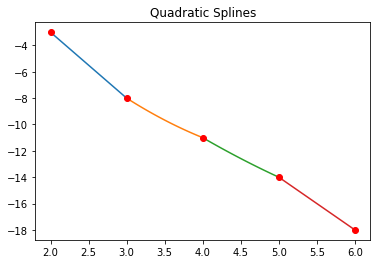

In [13]:
values = Optimize.quadratic_spline([2,3,4,5,6], [-3,-8,-11,-14,-18], plot=True)

## Impact and inclusivity

Our goal for DreamDiff is for it to live well beyond the confines of a computer science course, as all good software should. While we believe it has potential to be used in a wide range of exciting applications, it is important to also consider the broader implications of our software.

Our package implements forward-mode automatic differentiation, gradient descent, Nesterov's accelerated gradient descent, Newton’s method and quadratic splines. All these tools have distinct usages, but we hope the convenience of a centralized optimization package provides some extra utility to users working on various optimization tasks in machine learning, minimization and maximization problems, and interpolation using quadratic splines.

Further, we hope that the visualization and animation functionality built into our optimization functions serve as a useful educational tool, providing a more intuitive understanding of how these methods work and encouraging math and computer science education more broadly. Perhaps most importantly, we hope that by open-sourcing our software, it will be accessible to as many people as possible. We believe that open-source platforms like GitHub have inherent advantages for inclusivity, providing open access to people around the world who may want to utilize or build upon its core functionality. Nonetheless, it is important to address the more subtle yet persistent inequalities in software development and the broader field of computer science.

For example, open source still requires an internet connection, which automatically excludes the 3.6 billion people across the globe (around 47% of the world's population) who do not use the internet, let alone have a computer or access to the educational resources required to learn basic STEM skills. But even in regions of the world where internet access is not an issue, historical gender imbalances have created barriers for women and people of color in computer science. Regardless of your own background, we ask that you keep these inequities in mind and consider how your own work environment can be made more inclusive, particularly for groups that face historical barriers in STEM fields.

## Future

# NOT DONE YET

## References
1. Hoffmann, P. H. (2016). A hitchhiker’s guide to automatic differentiation. Numerical Algorithms, 72(3), 775-811.
2. van Merrienboer, B., Moldovan, D., & Wiltschko, A. (2018). Tangent: Automatic differentiation using source-code transformation for dynamically typed array programming. In Advances in Neural Information Processing Systems (pp. 6256-6265).
3. https://harvard-iacs.github.io/2020-CS107/lectures/.
4. Griewank, A. and Walther, A., 2008. Evaluating derivatives: principles and techniques of algorithmic differentiation (Vol. 105). Siam.
5. Nocedal, J. and Wright, S., 2001. Numerical Optimization, Second Edition. Springer.